# <p style="text-align: center;"> <b>Question 1</b></p>
---

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #867FEE; font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents ✍️</b></h3>

- [1. Question](#1)
    - [1.1 The purpose of the question](#1.1)
    - [1.2 How to solve the question](#1.2)
- [2. Solution](#2)
    - [2.1 Preparation](#2.1)
    - [2.2 Data Analysis](#2.2)
- [3. Answer the question](#3)


<a class="anchor" id="1"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">1. Question  </div>
- What is the most popular genre? (This is an open-ended question)

<a class="anchor" id="1.1"></a>
## <span style='color:#2B9C15 '> 1.1 The purpose of the question 👁️‍🗨️ </span>

- **Understanding Audience Trends**: This can be useful in creating music content or events that resonate with the audience.
- **Planning for Events/Programs**: Knowing which genre is most popular can help you plan your event or program to attract the widest audience.
- **Supporting Advertising and Marketing**: Optimizing advertising and marketing strategies.
- **Artist Development Strategy**: For music artists, understanding the current trends and characteristics of different genres can support the development of their strategy, from genre selection to building an image that appeals to the target audience.



<a class="anchor" id="1.2"></a>
## <span style='color:#2B9C15 '> 1.2 How to solve the question 📊 </span>

**👉 Analyzing genre-related characteristics:**
- Number of songs for each genre.
- Average popularity score for each genre.
- Explicit ratio.
- Genres in the top ~110 most popular songs.
- Ratio of live songs for each genre.
- Comparing the correlation between loudness and energy in the top 3 most popular genres.

<a class="anchor" id="2"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">2. Solution  </div>

<a class="anchor" id="2.1"></a>
## <span style='color:#2B9C15 '> 2.1 Preparation </span>

#### Import Libraries and set up for analysis

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

In [12]:
df = pd.read_csv('./data/cleaned_dataset.csv')
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic



<a class="anchor" id="2.2"></a>
## <span style='color:#2B9C15 '> 2.2 Data Analysis </span>

### ❓ Number of genres in the dataset

In [13]:
unique_genres = df['track_genre'].unique()
print(len(unique_genres))

114


### ❓ Top 10 genres with the highest number of songs
- &#x1F4A1; The objective of the analysis is to determine which genre(s) authors choose to compose the most.
- &#x1F4D9; Retrieve the frequency of each value in the track_genre column, extract the top 10 genres with the highest frequency, and then visualize the results.

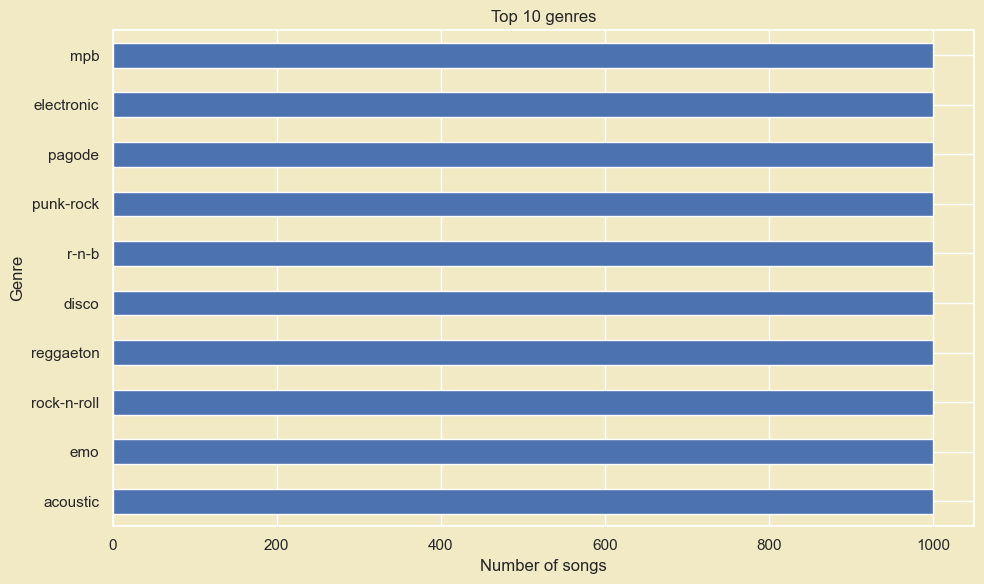

In [14]:
genre_counts = df['track_genre'].value_counts()
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='barh')
plt.title('Top 10 genres')
plt.xlabel('Number of songs')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

### 📖 COMMENT:
- Based on the chart, we can see that the top 10 genres with the highest number of songs all have 1000 songs.
- This is the characteristic of the dataset, the author has collected about 1000 songs of each genre to create this dataset.

### ❓ Which genre has the highest average popularity score?
- &#x1F4A1; The objective of the analysis is to determine the most popular `genres`.
- &#x1F4D9; 
    - Group the data by the `track_genre` column, creating data groups for each genre. Calculate the mean value of the `popularity` column within each group. Convert the results into a DataFrame and reset the index for convenience in subsequent processing.
    - Next, extract the top 10 `genres` with the highest popularity values and visualize the results.

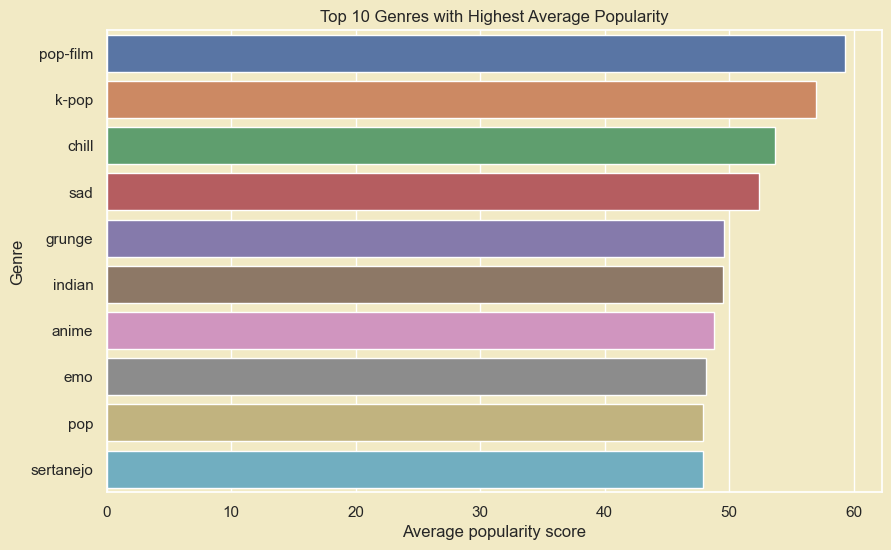

In [15]:
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().reset_index()
top10_popular_genres = avg_popularity_by_genre.nlargest(10, 'popularity')

plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_genre', data=top10_popular_genres)
plt.title('Top 10 Genres with Highest Average Popularity')
plt.xlabel('Average popularity score')
plt.ylabel('Genre')
plt.show()

### 📖 COMMENT:
- Based on the chart, we observe that the highest average popularity score for a genre is approximately 60, not significantly higher than the rest in the top 10.
- We also see diversity within each genre, with notable genres including `pop-film`, `k-pop`, `chill`, and `sad`. 
- Specifically:
    - The `pop-film` genre tends to be broad, drawing inspiration from music featured in popular films. Listeners may have familiarity and connection with these songs as they often appear in well-known cinematic works.
    - `K-pop` not only provides catchy music but also incorporates visual and image elements. The diversity in the music and visuals of K-pop groups often attracts a global audience.
    - The `chill` genre typically features gentle and soothing music designed to help listeners relax and reduce stress. The comfort of chill music often enhances a sense of ease and comfort.
    - The `sad` genre often contains emotionally charged songs, expressing deep and powerful emotions. Listeners often feel a strong connection to these songs as they convey profound emotions and feelings.

### ❓ Which genre has the highest rate of explicit songs?

- &#x1F4A1; The objective of the analysis is to determine which genre has the highest proportion of explicit songs.
- &#x1F4D9; 
    - Group the data by the `track_genre` column, creating data groups for each genre. Calculate the mean value of the `explicit` column within each group. Convert the results into a DataFrame and reset the index for convenience in subsequent processing.
    - Next, extract the top 10 `genres` with the highest explicit values and visualize the results.

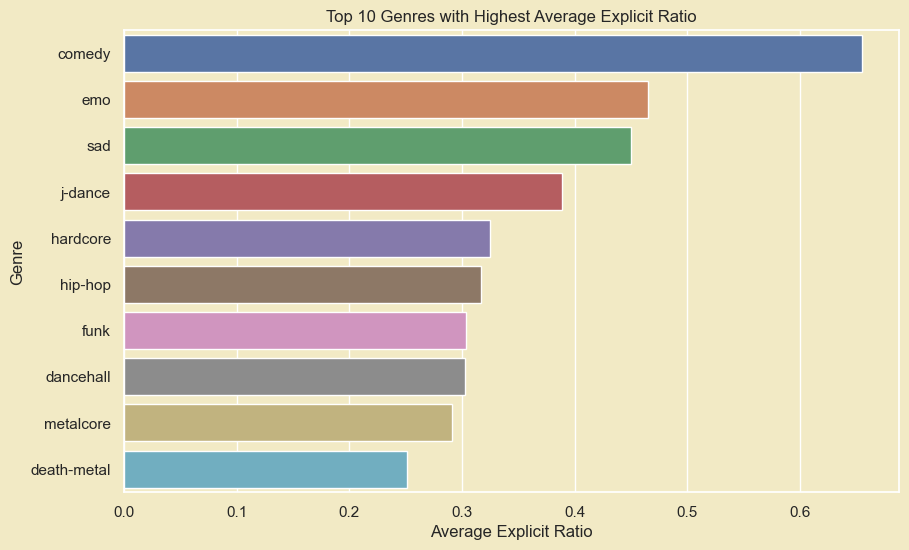

In [16]:
explicit_ratio_by_genre = df.groupby('track_genre')['explicit'].mean().reset_index()
top5_explicit_genres = explicit_ratio_by_genre.nlargest(10, 'explicit')

plt.figure(figsize=(10, 6))
sns.barplot(x='explicit', y='track_genre', data=top5_explicit_genres)
plt.title('Top 10 Genres with Highest Average Explicit Ratio')
plt.xlabel('Average Explicit Ratio')
plt.ylabel('Genre')
plt.show()

### 📖 COMMENT:
- Based on the chart, the `comedy` genre has the highest `Explicit` ratio by a significant margin. There are several reasons for this:
    - The comedy genre often uses humorous language and explicit content to emphasize its comedic and entertaining nature.
    - Artists in this genre may use humorous language, satirical language trends, or even explicit language to create a strong comedic effect.
- On the other hand, genres like emo and sad contain deep emotions:
    - Genres such as `emo` and `sad` often focus on expressing profound emotions and suffering. The use of explicit language may be a way to enhance the impact of the emotional and authentic message.
- The `jdance` genre might include elements of confrontation, independence, and freedom of expression. Using explicit language could be a way to express personal freedom and uniqueness in language.

- Genres with a high explicit ratio may attract listeners seeking music with edginess and linguistic freedom.

### ❓ Which genre has the highest number of songs in the top 0.001% (~110) most popular songs?


- &#x1F4A1; The objective of the analysis is to identify the predominant genre among the top-ranked popular songs.
- &#x1F4D9; 
    - Sort the DataFrame by the 'popularity' column in descending order. 
    - Select the number of rows corresponding to 0.001% of the total rows in the sorted DataFrame. 
    - Group the data by the 'track_genre' column and calculate the size (number of songs) for each group. 
    - Convert the results into a DataFrame, reset the index, and name the result column 'count'. 
    - Finally, sort the DataFrame by the count of songs in descending order and visualize the results.

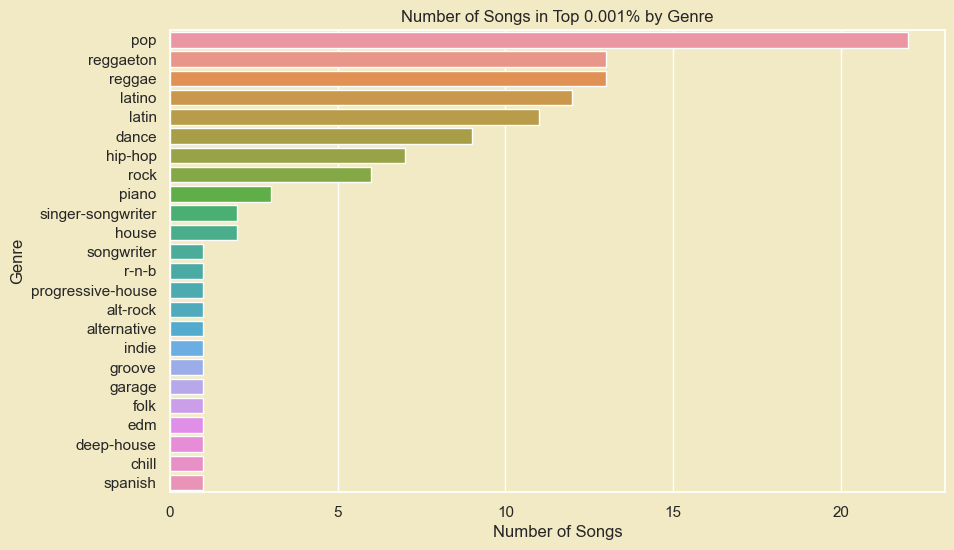

The genre with the most songs in the top 0.001% is pop with 22 songs.


In [17]:
df_sorted = df.sort_values(by='popularity', ascending=False)

top_10_percent = df_sorted.head(int(0.001 * len(df_sorted)))

top_genres_count = top_10_percent.groupby('track_genre').size().reset_index(name='count')
top_genres_count = top_genres_count.sort_values(by='count', ascending=False)

most_common_genre = top_genres_count.loc[top_genres_count['count'].idxmax()]

# Bước 5: Visualize Kết Quả
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='track_genre', data=top_genres_count)
plt.title('Number of Songs in Top 0.001% by Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

print(f"The genre with the most songs in the top 0.001% is {most_common_genre['track_genre']} with {most_common_genre['count']} songs.")

### 📖 COMMENT:
- Based on the chart, in the top `0.001%` of popular songs, there is a large diversity of genres.
- However, one genre stands out significantly from the rest:
    - The `pop` genre is one of the most popular music genres worldwide.
    - `Pop` music often combines elements from various genres such as `dance`, `hip-hop`, `rock`, and `R&B`, creating diversity in pop music that appeals to a broad audience.
    - Famous pop artists frequently appear in top music charts, and their popularity contributes to the widespread appeal of the pop genre in popular lists.
    - `Pop` songs are often supported by strong marketing and advertising strategies. Large presence on streaming platforms, television, and other media enhances visibility and appreciation from the audience.


### ❓ Which genre has the highest ratio of live songs?

- &#x1F4A1; The objective of the analysis is to identify which genre has the highest proportion of live songs.
- &#x1F4D9; 
    - Group the data by the `track_genre` column, creating data groups for each genre. Calculate the mean value of the `liveness` column within each group. Convert the results into a DataFrame and reset the index for convenience in subsequent processing.
    - Next, extract the top 10 `genres` with the highest `liveness` values and visualize the results.

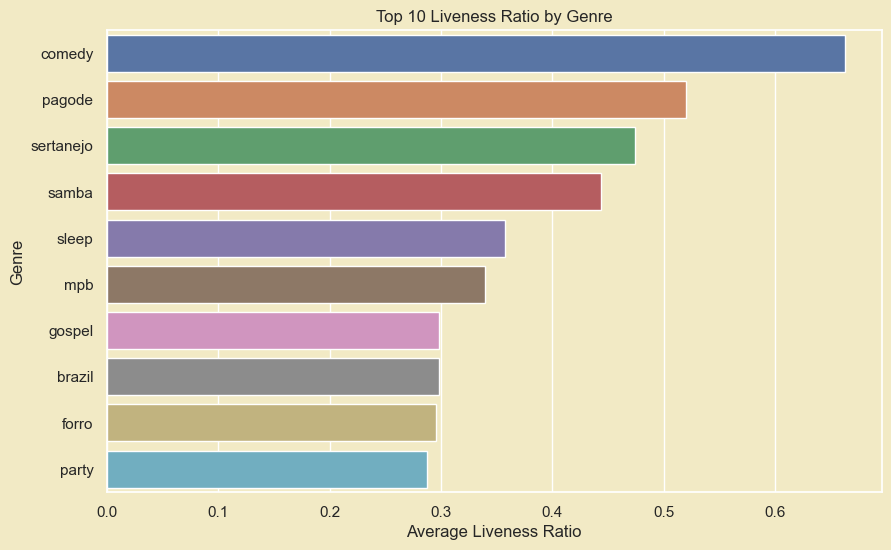

The genre with the highest liveness ratio is comedy with an average liveness ratio of 66.22%.


In [18]:
live_ratio_by_genre = df.groupby('track_genre')['liveness'].mean().reset_index()

top10_live_genres = live_ratio_by_genre.nlargest(10, 'liveness')
most_live_genre = live_ratio_by_genre.loc[live_ratio_by_genre['liveness'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='liveness', y='track_genre', data=top10_live_genres)
plt.title('Top 10 Liveness Ratio by Genre')
plt.xlabel('Average Liveness Ratio')
plt.ylabel('Genre')
plt.show()
print(f"The genre with the highest liveness ratio is {most_live_genre['track_genre']} with an average liveness ratio of {most_live_genre['liveness']:.2%}.")

### 📖 COMMENT:
- Based on the chart, the `comedy` genre has the highest `live` ratio because:
    - Direct interaction and audience reactions are crucial parts of the comedy genre experience.
    - Comedy often focuses on interacting with the audience. Live performances provide opportunities for comedians to engage directly, ask questions, and even create spontaneous and humorous moments during the show.
- A high ratio of live songs may reflect the audience's preference for live recordings, with their passion for the lively atmosphere and direct interaction.
- Artists and bands often have higher creative freedom during live performances. This can help create unique and more intimate performance versions that resonate closely with the audience.

### Based on the Correlation section in the Exploring and Preprocessing file, we find that the highest correlation is between `loudness` and `energy`.

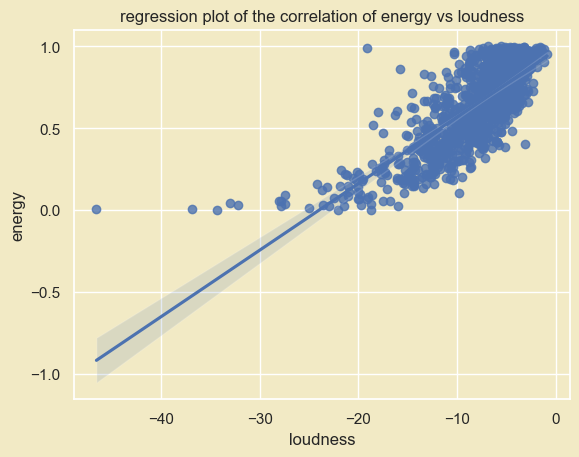

In [19]:
sample = df.sample(int(0.01 * len(df)))
sns.regplot(data=sample, y="energy", x="loudness", color="b")
plt.title("regression plot of the correlation of energy vs loudness")
plt.show()

### ❓ The correlation between `loudness` and `energy` in the top 3 genres with the highest average popularity.

- &#x1F4A1; The objective of the analysis is to determine the correlation between 'loudness' and 'energy' within the genres with the highest popularity scores. This will help identify trends within those genres.
- &#x1F4D9; 
    - Group the data by the 'track_genre' column and calculate the mean value of the 'popularity' column within each group. 
    - Convert the results into a DataFrame and reset the index for convenience in subsequent processing. 
    - Select the top 3 rows with the highest values in the 'popularity' column, indicating the top 3 genres with the highest average popularity scores.
    - Filter the rows in the DataFrame where the 'track_genre' values are among the top 3 popular genres.
    - Next, plot a correlation chart for songs belonging to those three genres.

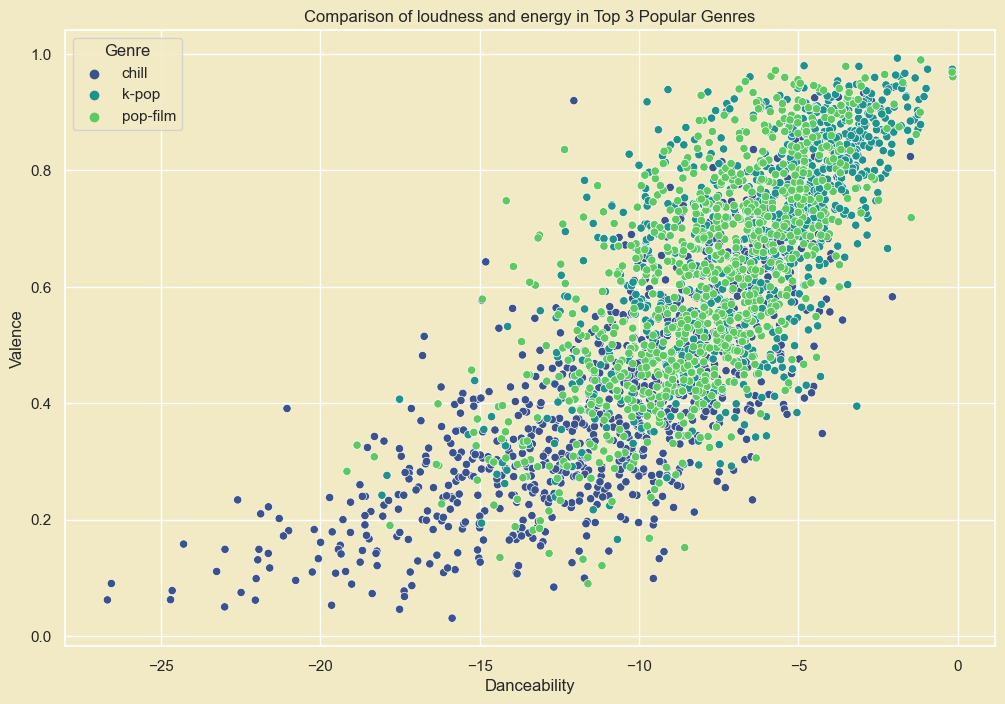

In [20]:
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().reset_index()

top3_popular_genres = avg_popularity_by_genre.nlargest(3, 'popularity')

top3_genre_data = df[df['track_genre'].isin(top3_popular_genres['track_genre'])]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='loudness', y='energy', hue='track_genre', data=top3_genre_data, palette='viridis')
plt.title('Comparison of loudness and energy in Top 3 Popular Genres')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.legend(title='Genre')
plt.show()

### 📖 COMMENT: 
- According to the chart, the correlation between `loudness` and `energy` in the selected top 3 music genres is quite significant. This may imply that songs with high `loudness` also tend to have high `energy` in these genres. There are several reasons for this observation:
    - `Loudness` is typically measured based on the overall sound level of the entire song, while `energy` is often associated with the perceived intensity and dynamism in music. Therefore, if a song has high `loudness`, it may convey a sense of strength and dynamism, elevating both of these characteristics.
    - Music with high `loudness` often tends to be expressive and lively. The strength of the sound and the sense of dynamism are often correlated with high `energy`.
    - Audiences often favor powerful, dynamic, and vibrant music. Therefore, songs with high `loudness` and `energy` may be appealing and attractive to a broad audience.

<a class="anchor" id="3"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3. Answer the question  </div>

- **After analyzing and visualizing the results, we draw several conclusions:**
    - Firstly, the top 4 genres with the highest average popularity are: `pop-film`, `k-pop`, `chill`, `sad`.
    - `Comedy` is the genre with the highest `explicit` ratio compared to all other genres.
    - In the top approximately 110 most popular songs, the `pop` genre stands out, dominating over the rest and accounting for about 1/5 of the songs.
    - Among the top genres for live performances are `comedy`, `pagode`, `sertanejo`, and `samba`.
    - The correlation between `loudness` and `energy` is notably high.

- **So, which genre is the most popular?**
    - Answering this question requires looking at it from various perspectives. For music listeners, the popularity score indicates their preferences. However, delving deeper into details reveals that the `pop` genre surpasses all others, especially in the top-ranking songs. It constitutes around 1/5 of the top songs.
    - Considering characteristics like `live`, `loudness`, and `energy`, there is an audience preference for live, energetic performances, as seen in genres like pop.
    - From an artist's standpoint, some may desire broader popularity, while others may choose to follow personal interests rather than trends.
    - Event organizers aim for lively and captivating shows to attract a large audience.
- #### There's no single correct answer to the question posed by our group. Each viewpoint provides different responses suitable for that particular aspect. After this analysis, we hope artists can create hits that become even more widely popular.

<div style="text-align: left; background-color:#867FEE; font-family:Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">END</div>